In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model

# Mount Google Drive (if using Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')

IMG_HEIGHT, IMG_WIDTH = 224, 224


E:\SLIIT\__4th_Year\Research Project - IT4010\dev\ENT-disease-detection-dl-models\.venv\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [3]:

model_path = "../waters_view_validator.h5"
# Load the trained model
model = load_model(model_path, compile=False)

In [4]:

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load image
    if img is None:
        raise ValueError(f"Could not read image from {image_path}")
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))  # Resize
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    return img

# Function to classify the image
def classify_image(image_path):
    try:
        img = preprocess_image(image_path)
        prediction = model.predict(img)

        print(f"Prediction: {prediction}")

        probability = prediction[0][0]  # Get the prediction score

        if probability > 0.5:
            return "Valid: Water's View"
        else:
            return "Invalid Image"
    except Exception as e:
        return f"Error: {e}"


# Test the model

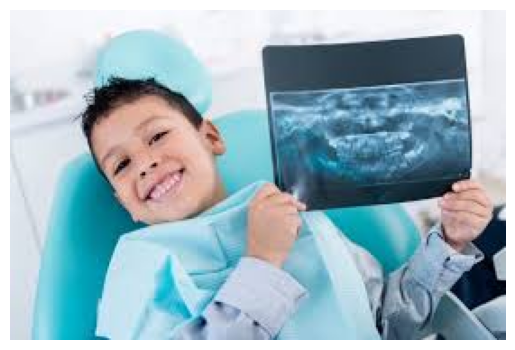

In [5]:
# Test the model
image_path_valid = "E:\SLIIT\__4th_Year\Research Project - IT4010\Dataset - Waters View Sinus X Ray\sinusities_dataset\mild\mild_18.JPEG"
image_path_invalid = "E:\SLIIT\__4th_Year\Research Project - IT4010\Dataset - Waters View Sinus X Ray\\test\Invalid-(test)\images.jpg"

# test_image_path = "/content/drive/MyDrive/sinusities/test_waters_view/moderate_sinus_91.jpg"

image = Image.open(image_path_invalid).convert("RGB")

# Show the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

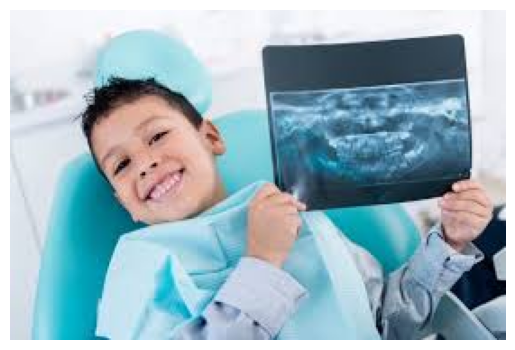

1/1 [==============================] - 0s 34ms/step
Prediction: [[4.6493595e-05]]
Test Result: Invalid Image


In [7]:

plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

result = classify_image(image_path_invalid)
print(f"Test Result: {result}")
